In [1]:
import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt

In [2]:
subject11_path = "./../artifacts/data/raw/AEP/Subject_13_H_AEP_Run_01.set"
subject13_path = "./../artifacts/data/raw/AEP/Subject_13_H_AEP_Run_01.set"
dataset = mne.io.read_epochs_eeglab(input_fname = subject11_path)
test_set = mne.io.read_epochs_eeglab(input_fname = subject13_path)


Extracting parameters from c:\Users\Amine\Desktop\Projects\project_study_of_attentional_deficit\research\..\artifacts\data\raw\AEP\Subject_13_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\Amine\Desktop\Projects\project_study_of_attentional_deficit\research\..\artifacts\data\raw\AEP\Subject_13_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Amine\AppData\Local\Temp\ipykernel_8960\2537648109.py:3: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  dataset = mne.io.read_epochs_eeglab(input_fname = subject11_path)
C:\Users\Amine\AppData\Local\Temp\ipykernel_8960\2537648109.py:4: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  test_set = mne.io.read_epochs_eeglab(input_fname = subject13_path)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


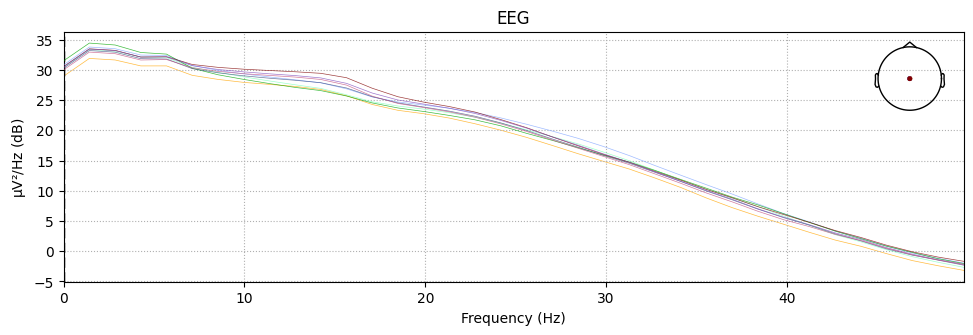

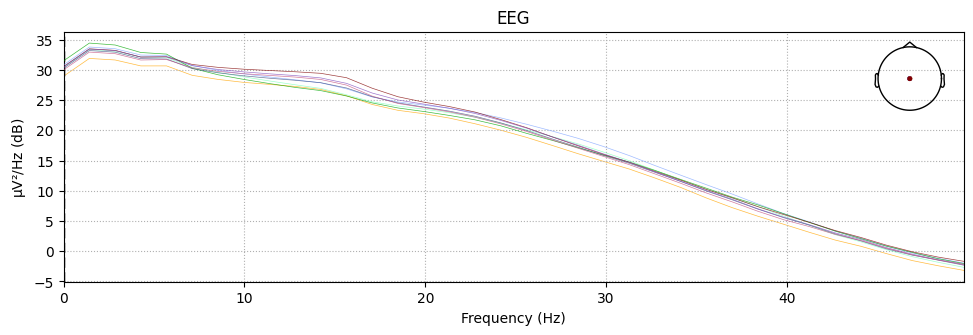

In [3]:
dataset.plot_psd(fmax=50)

In [4]:
dataset.filter(12., 30., fir_design='firwin')

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 283 samples (1.105 s)



C:\Users\Amine\AppData\Local\Temp\ipykernel_8960\4083432546.py:1: RuntimeWarning: filter_length (283) is longer than the signal (180), distortion is likely. Reduce filter length or filter a longer signal.
  dataset.filter(12., 30., fir_design='firwin')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.1s
[Parallel(

Number of events,480
Events,0: 4201: 60
Time range,-0.102 – 0.598 s
Baseline,off


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


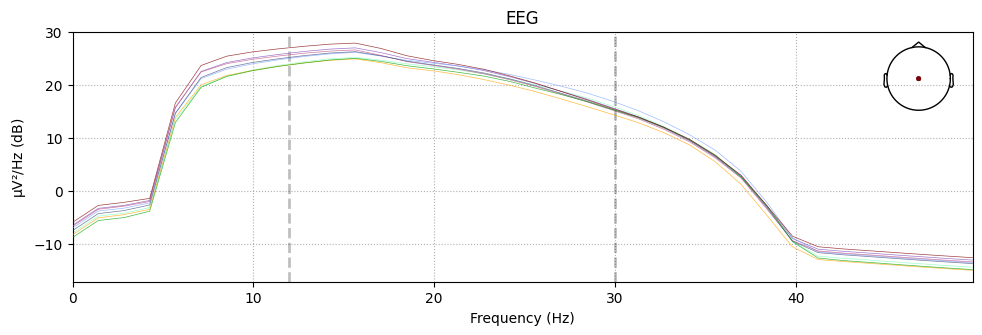

In [5]:
dataset.plot_psd(fmax=50)

In [8]:
dataset.plot_topo_psd(show=False)


AttributeError: 'EpochsEEGLAB' object has no attribute 'plot_topo_psd'

Using matplotlib as 2D backend.


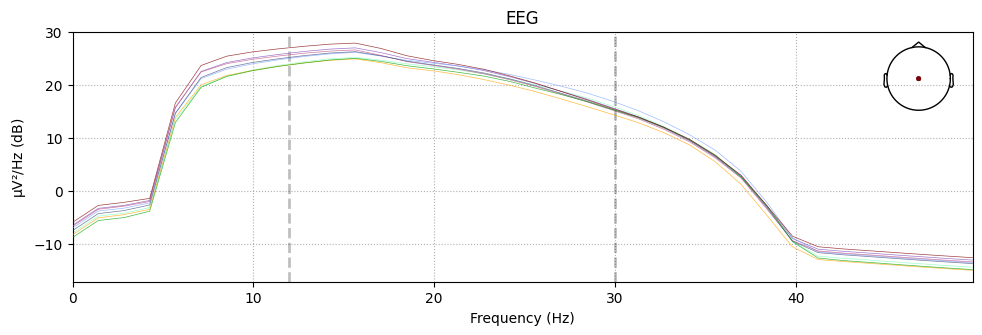

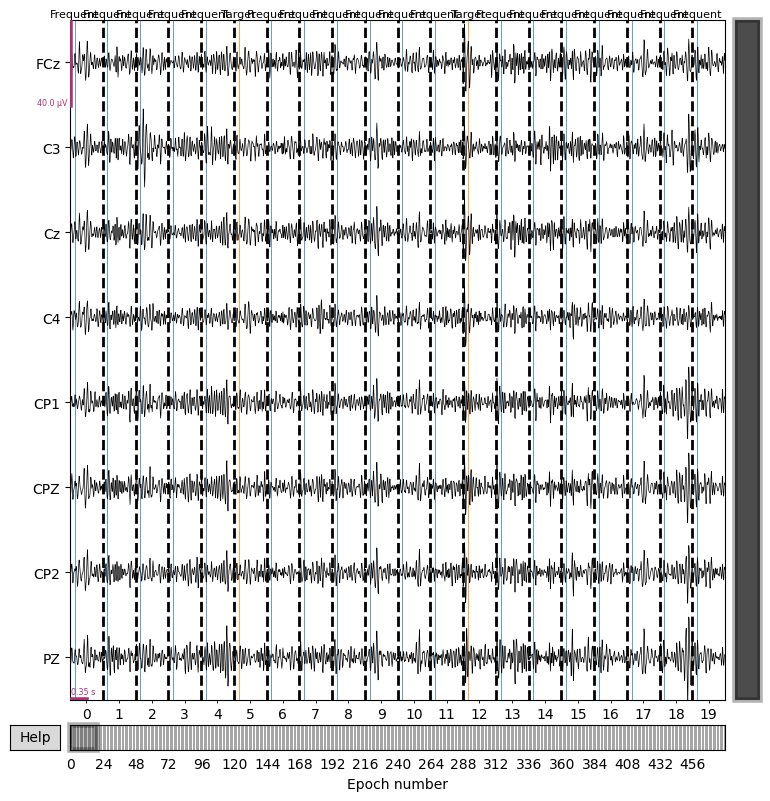

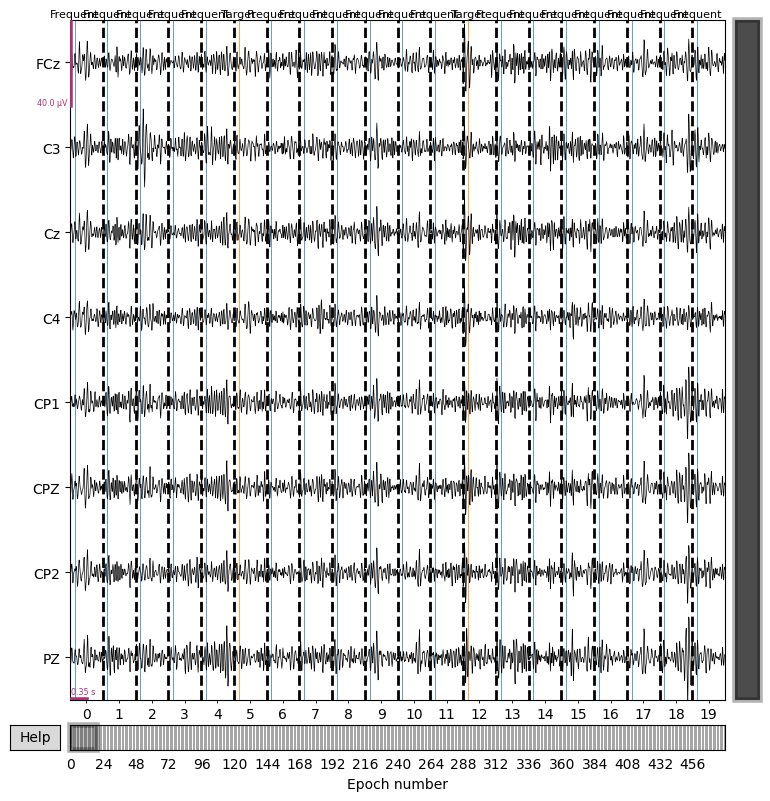

In [6]:
events_num = dataset.events
event_id = {'Frequent': 1, 'Target': 2}
dataset.plot(butterfly=False, events=events_num, event_id=event_id)


In [7]:
t = dataset.times
x = dataset.get_data()
y = dataset.events[:,2]
x_csp_average = CSP(n_components=6, transform_into='average_power').fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 5.9e-06 (2.2e-16 eps * 8 dim * 3.3e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2e-06 (2.2e-16 eps * 8 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-1.24825086 -1.52327363 -1.21002713 -0.6837198  -0.72810185 -1.11533664]
 [-1.45895624 -1.27542844 -0.96844345 -1.12181532 -1.11424811 -1.2774302 ]
 [-1.60544041 -0.51388949 -0.96487708 -0.06119294 -0.56596444 -1.86417862]
 ...
 [-0.48921939 -0.74946541 -0.47940078 -0.29825047 -0.56494737 -0.34136854]
 [-1.33083771 -1.1468668  -1.09958213 -1.11964491 -1.73055676 -1.4649299 ]
 [-1.44474839 -1.03362039 -1.53072068 -1.6187303

In [48]:
classes, counts = np.unique(y, return_counts=True)

print(classes)
print(counts)

[1 2]
[420  60]


In [50]:
dataframe = dataset.to_data_frame()

In [54]:
dataframe


,time,condition,epoch,FCz,C3,Cz,C4,CP1,CPZ,CP2,PZ
0,-101.56250,0,0,0.528743,-0.890001,-1.761087,-0.783686,-0.693582,-0.997268,-1.225807,-0.356206
1,-97.65625,0,0,-0.870469,-1.707772,-2.126665,-0.355332,-1.436919,-1.859058,-1.429398,-1.287625
2,-93.75000,0,0,-2.327603,-2.244402,-2.025784,0.190819,-1.948664,-2.614736,-1.364717,-2.202812
3,-89.84375,0,0,-3.299634,-2.337301,-1.394737,0.709533,-2.046820,-3.044647,-1.048091,-2.842693
4,-85.93750,0,0,-3.345522,-1.960907,-0.325145,1.096989,-1.652904,-2.933125,-0.543038,-2.970851
...,...,...,...,...,...,...,...,...,...,...,...
86395,582.03125,0,479,2.023742,0.204887,1.461274,0.539229,0.687258,1.115493,1.207572,1.519643
86396,585.93750,0,479,2.402949,0.415785,1.488900,0.849097,1.069618,1.915461,1.581807,2.208183
86397,589.84375,0,479,2.177942,0.525620,1.090746,0.949201,1.098628,2.069203,1.572208,2.224712
86398,593.75000,0,479,1.475231,0.501070,0.404862,0.817445,0.861178,1.588633,1.221730,1.608427


# Reading fdt files

In [55]:
# subject 11
epochs_s11 = mne.io.read_epochs_eeglab(subject11_path)

Extracting parameters from c:\Users\Amine\Desktop\Projects\project_study_of_attentional_deficit\research\..\artifacts\data\raw\AEP\Subject_13_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Amine\AppData\Local\Temp\ipykernel_1496\2902222766.py:2: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  epochs_s11 = mne.io.read_epochs_eeglab(subject11_path)


In [56]:
epochs_s11.info

<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>

In [57]:
 epochs_s11.times


array([-0.1015625 , -0.09765625, -0.09375   , -0.08984375, -0.0859375 ,
       -0.08203125, -0.078125  , -0.07421875, -0.0703125 , -0.06640625,
       -0.0625    , -0.05859375, -0.0546875 , -0.05078125, -0.046875  ,
       -0.04296875, -0.0390625 , -0.03515625, -0.03125   , -0.02734375,
       -0.0234375 , -0.01953125, -0.015625  , -0.01171875, -0.0078125 ,
       -0.00390625,  0.        ,  0.00390625,  0.0078125 ,  0.01171875,
        0.015625  ,  0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,
        0.03515625,  0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,
        0.0546875 ,  0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,
        0.07421875,  0.078125  ,  0.08203125,  0.0859375 ,  0.08984375,
        0.09375   ,  0.09765625,  0.1015625 ,  0.10546875,  0.109375  ,
        0.11328125,  0.1171875 ,  0.12109375,  0.125     ,  0.12890625,
        0.1328125 ,  0.13671875,  0.140625  ,  0.14453125,  0.1484375 ,
        0.15234375,  0.15625   ,  0.16015625,  0.1640625 ,  0.16

In [58]:
epochs_s11._data.shape

(480, 8, 180)

In [50]:
epochs_s11.ch_names

['FCz', 'C3', 'Cz', 'C4', 'CP1', 'CPZ', 'CP2', 'PZ']

In [59]:
epochs_s11._data.shape

(480, 8, 180)

In [53]:
# get epoch name 
len(epochs_s11._data)

480

In [25]:

import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fftpack import fft
from scipy.signal import welch
from pywt import wavedec

all_features = []

for epoch in epochs_s11._data:
    epoch_features = []
    for channel_data in epoch:
        # Time-domain features
        mean = np.mean(channel_data)
        var = np.var(channel_data)
        skewness = skew(channel_data)
        kurt = kurtosis(channel_data)
        
        # Frequency-domain features
        fft_vals = np.abs(fft(channel_data))
        fft_mean = np.mean(fft_vals)
        fft_var = np.var(fft_vals)
        _, psd = welch(channel_data, fs=256)
        psd_mean = np.mean(psd)
        psd_var = np.var(psd)
        spectral_entropy = -np.sum(psd*np.log2(psd))
        
        # Time-frequency domain features
        coeffs = wavedec(channel_data, 'db1', level=4)
        wavelet_coeffs_mean = np.mean(coeffs[-1])
        wavelet_coeffs_var = np.var(coeffs[-1])
        
        # Hjorth parameters
        first_diff = np.diff(channel_data)
        second_diff = np.diff(first_diff)
        activity = np.var(channel_data)
        mobility = np.sqrt(np.var(first_diff) / activity)
        complexity = np.sqrt(np.var(second_diff) / np.var(first_diff)) / mobility
        
        # Statistical Features
        min_val = np.min(channel_data)
        max_val = np.max(channel_data)
        zero_crossings = len(np.where(np.diff(np.sign(channel_data)))[0])
        
        # Combine all features
        channel_features = [mean, var, skewness, kurt, 
                            fft_mean, fft_var, psd_mean, psd_var, spectral_entropy,
                            wavelet_coeffs_mean, wavelet_coeffs_var,
                            activity, mobility, complexity,
                            min_val, max_val, zero_crossings]
        
        epoch_features.extend(channel_features)
    all_features.append(epoch_features)

X_features = np.array(all_features)
X_features.shape


c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '


(480, 136)

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features)

classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}


y_labels = epochs_s11.events[:, -1]

conf_matrices = {}

loo = LeaveOneOut()
for name, clf in classifiers.items():
    y_pred = cross_val_predict(clf, X_features_scaled, y_labels, cv=loo)
    conf_matrices[name] = confusion_matrix(y_labels, y_pred)

conf_matrices


KeyboardInterrupt: 

# feature selection 

In [28]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RandomForestClassifier(n_estimators=100))
X_reduced = selector.fit_transform(X_features_scaled, y_labels)

X_features_scaled.shape, X_reduced.shape

((480, 136), (480, 51))

In [29]:
from sklearn.model_selection import StratifiedKFold

conf_matrices_reduced = {}

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, clf in classifiers.items():
    y_pred = cross_val_predict(clf, X_reduced, y_labels, cv=strat_kfold)
    conf_matrices_reduced[name] = confusion_matrix(y_labels, y_pred)


conf_matrices_reduced

{'SVM': array([[419,   1],
        [ 57,   3]], dtype=int64),
 'Random Forest': array([[414,   6],
        [ 49,  11]], dtype=int64),
 'KNN': array([[413,   7],
        [ 53,   7]], dtype=int64),
 'Logistic Regression': array([[409,  11],
        [ 42,  18]], dtype=int64)}

# SUBJECT 13

In [34]:
epochs_s13 = mne.io.read_epochs_eeglab(subject13_path)
epochs_s13.info, epochs_s13.times, epochs_s13._data.shape


Extracting parameters from c:\Users\Amine\Desktop\Projects\project_study_of_attentional_deficit\research\..\data\raw\AEP\Subject_13_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\Amine\AppData\Local\Temp\ipykernel_1496\3214565232.py:1: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  epochs_s13 = mne.io.read_epochs_eeglab(subject13_path)


(<Info | 8 non-empty values
  bads: []
  ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
  chs: 8 EEG
  custom_ref_applied: False
  dig: 11 items (3 Cardinal, 8 EEG)
  highpass: 0.0 Hz
  lowpass: 128.0 Hz
  meas_date: unspecified
  nchan: 8
  projs: []
  sfreq: 256.0 Hz
 >,
 array([-0.1015625 , -0.09765625, -0.09375   , -0.08984375, -0.0859375 ,
        -0.08203125, -0.078125  , -0.07421875, -0.0703125 , -0.06640625,
        -0.0625    , -0.05859375, -0.0546875 , -0.05078125, -0.046875  ,
        -0.04296875, -0.0390625 , -0.03515625, -0.03125   , -0.02734375,
        -0.0234375 , -0.01953125, -0.015625  , -0.01171875, -0.0078125 ,
        -0.00390625,  0.        ,  0.00390625,  0.0078125 ,  0.01171875,
         0.015625  ,  0.01953125,  0.0234375 ,  0.02734375,  0.03125   ,
         0.03515625,  0.0390625 ,  0.04296875,  0.046875  ,  0.05078125,
         0.0546875 ,  0.05859375,  0.0625    ,  0.06640625,  0.0703125 ,
         0.07421875,  0.078125  ,  0.08203125,  0.0859375 ,  0.08984375

In [35]:
# Initialize an empty list to store features for the second dataset
all_features_second = []

# Iterate over each epoch to compute features
for epoch in epochs_s13._data:
    epoch_features = []
    for channel_data in epoch:
        # Time-domain features
        mean = np.mean(channel_data)
        var = np.var(channel_data)
        skewness = skew(channel_data)
        kurt = kurtosis(channel_data)
        
        # Frequency-domain features
        fft_vals = np.abs(fft(channel_data))
        fft_mean = np.mean(fft_vals)
        fft_var = np.var(fft_vals)
        _, psd = welch(channel_data, fs=256)
        psd_mean = np.mean(psd)
        psd_var = np.var(psd)
        spectral_entropy = -np.sum(psd*np.log2(psd))
        
        # Time-frequency domain features
        coeffs = wavedec(channel_data, 'db1', level=4)
        wavelet_coeffs_mean = np.mean(coeffs[-1])
        wavelet_coeffs_var = np.var(coeffs[-1])
        
        # Hjorth parameters
        first_diff = np.diff(channel_data)
        second_diff = np.diff(first_diff)
        activity = np.var(channel_data)
        mobility = np.sqrt(np.var(first_diff) / activity)
        complexity = np.sqrt(np.var(second_diff) / np.var(first_diff)) / mobility
        
        # Statistical Features
        min_val = np.min(channel_data)
        max_val = np.max(channel_data)
        zero_crossings = len(np.where(np.diff(np.sign(channel_data)))[0])
        
        # Combine all features
        channel_features = [mean, var, skewness, kurt, 
                            fft_mean, fft_var, psd_mean, psd_var, spectral_entropy,
                            wavelet_coeffs_mean, wavelet_coeffs_var,
                            activity, mobility, complexity,
                            min_val, max_val, zero_crossings]
        
        epoch_features.extend(channel_features)
    all_features_second.append(epoch_features)

# Convert the list of features to a NumPy array
X_features_second = np.array(all_features_second)

# Standardize and reduce the features using the same scaler and selector trained on the first dataset
X_features_second_scaled = scaler.transform(X_features_second)
X_features_second_reduced = selector.transform(X_features_second_scaled)

# Show the shape of the feature set for the second dataset
X_features_second_reduced.shape


c:\Users\Amine\anaconda3\envs\stroke_project\lib\site-packages\scipy\signal\_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '


(480, 51)

In [39]:
# Train the Logistic Regression model on the first dataset
best_model = SVC()
best_model.fit(X_reduced, y_labels)

# Predict the labels for the second dataset
y_pred_second = best_model.predict(X_features_second_reduced)

# Since the objective is to classify epochs as 'Hit' or 'NoHit',
# we'll assume that labels are present in the 'event_id' of the second_epochs object.
y_labels_second = epochs_s13.events[:, -1]

# Generate the confusion matrix for the second dataset
conf_matrix_second = confusion_matrix(y_labels_second, y_pred_second)
conf_matrix_second


array([[420,   0],
       [ 46,  14]], dtype=int64)

Critical Analysis
Bias Towards 'NoHit': Both in the first and the second datasets, models seem to be biased towards predicting the 'NoHit' class. This could be due to class imbalance or the features being not sufficiently discriminative.

Generalization: The model trained on the first dataset showed reasonable generalization to the second dataset, although there's room for improvement, especially in detecting the 'Hit' class.

Feature Importance: Techniques like permutation importance or SHAP values could be applied for this.

Complexity vs Performance: Logistic Regression, a relatively simple model, outperformed other more complex models. This aligns with the principle of Occam's razor: simpler models are often better, especially when the dataset is not extremely large.

Optimization: Further hyperparameter tuning and feature engineering could likely improve the model's performance. Given your goals and interests, mastering these techniques will be crucial.